# Breast Cancer Detection

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!pip install pyforest

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14605 sha256=75134080428ef395368eefd7e40fae13ede4fd0ab3251f764bef981b39d6cc96
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [3]:
from pyforest import*

lazy_imports()

['from sklearn.linear_model import Ridge',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import awswrangler as wr',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import numpy as np',
 'import altair as alt',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import pandas as pd',
 'from sklearn.preprocessing import StandardScaler',
 'import plotly.express as px',
 'import keras',
 'import imutils',
 'from sklearn.linear_model import ElasticNetCV',
 'from sklearn.ensemble import RandomForestClassifier',
 'import glob',
 'import statistics',
 'from sklearn.model_selection import KFold',
 'import fastai',
 'import pickle',
 'import sys',
 'from openpyxl import load_workbook',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.preprocessing import OneHotEncoder',
 'import plotly as py',


Exploratary Data Analysis

### Data Analysis

In [4]:
data = pd.read_csv('/content/breastCancer.csv')
data.head()

<IPython.core.display.Javascript object>

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
data.shape

(699, 11)

In [6]:
data.isnull().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

### Data Pre-processing

In [7]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [8]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [9]:
data['bare_nucleoli'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

In [10]:
data[data['bare_nucleoli'] == '?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [11]:
data[data['bare_nucleoli'] == '?'].sum()

id                           13721250
clump_thickness                    54
size_uniformity                    39
shape_uniformity                   46
marginal_adhesion                  29
epithelial_size                    39
bare_nucleoli        ????????????????
bland_chromatin                    50
normal_nucleoli                    44
mitoses                            16
class                              36
dtype: object

In [12]:
digits_in_bare_nucleoli =  pd.DataFrame(data.bare_nucleoli.str.isdigit())

<IPython.core.display.Javascript object>

In [13]:
# digits_in_bare_nucleoli

In [14]:
df = data.replace('?',np.nan)

<IPython.core.display.Javascript object>

In [15]:
df

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [16]:
df['bare_nucleoli'].isnull().sum()

16

In [17]:
df['bare_nucleoli'].head(40)

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23    NaN
24      1
25      7
26      1
27      1
28      1
29      1
30      1
31      1
32      5
33      1
34      1
35      1
36      1
37      1
38     10
39      7
Name: bare_nucleoli, dtype: object

In [18]:
df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [19]:
df = df.fillna(df.median())

In [20]:
df.isnull().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [21]:
df['bare_nucleoli'].head(25)

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23    1.0
24      1
Name: bare_nucleoli, dtype: object

In [22]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [23]:
df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64')

In [24]:
df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

### Data Visualizing

In [25]:
df = df.drop('id',axis=1)

In [26]:
df

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


#### Bivaraiate data Analysis

#### Distplot

<IPython.core.display.Javascript object>

<ipython-input-28-42c743b4599b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['class'])


<Axes: xlabel='class', ylabel='Density'>

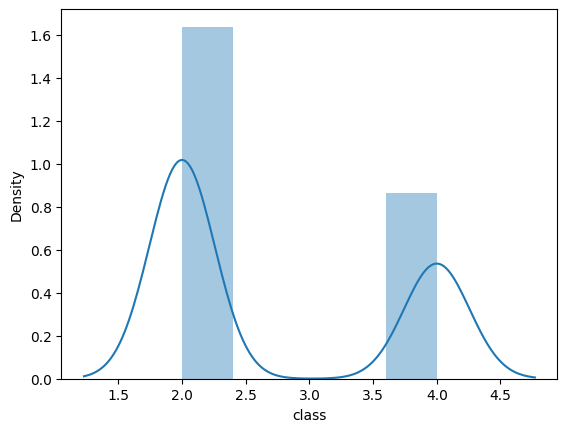

In [28]:
sns.distplot(df['class'])


#### MultiVariate Data Analysis

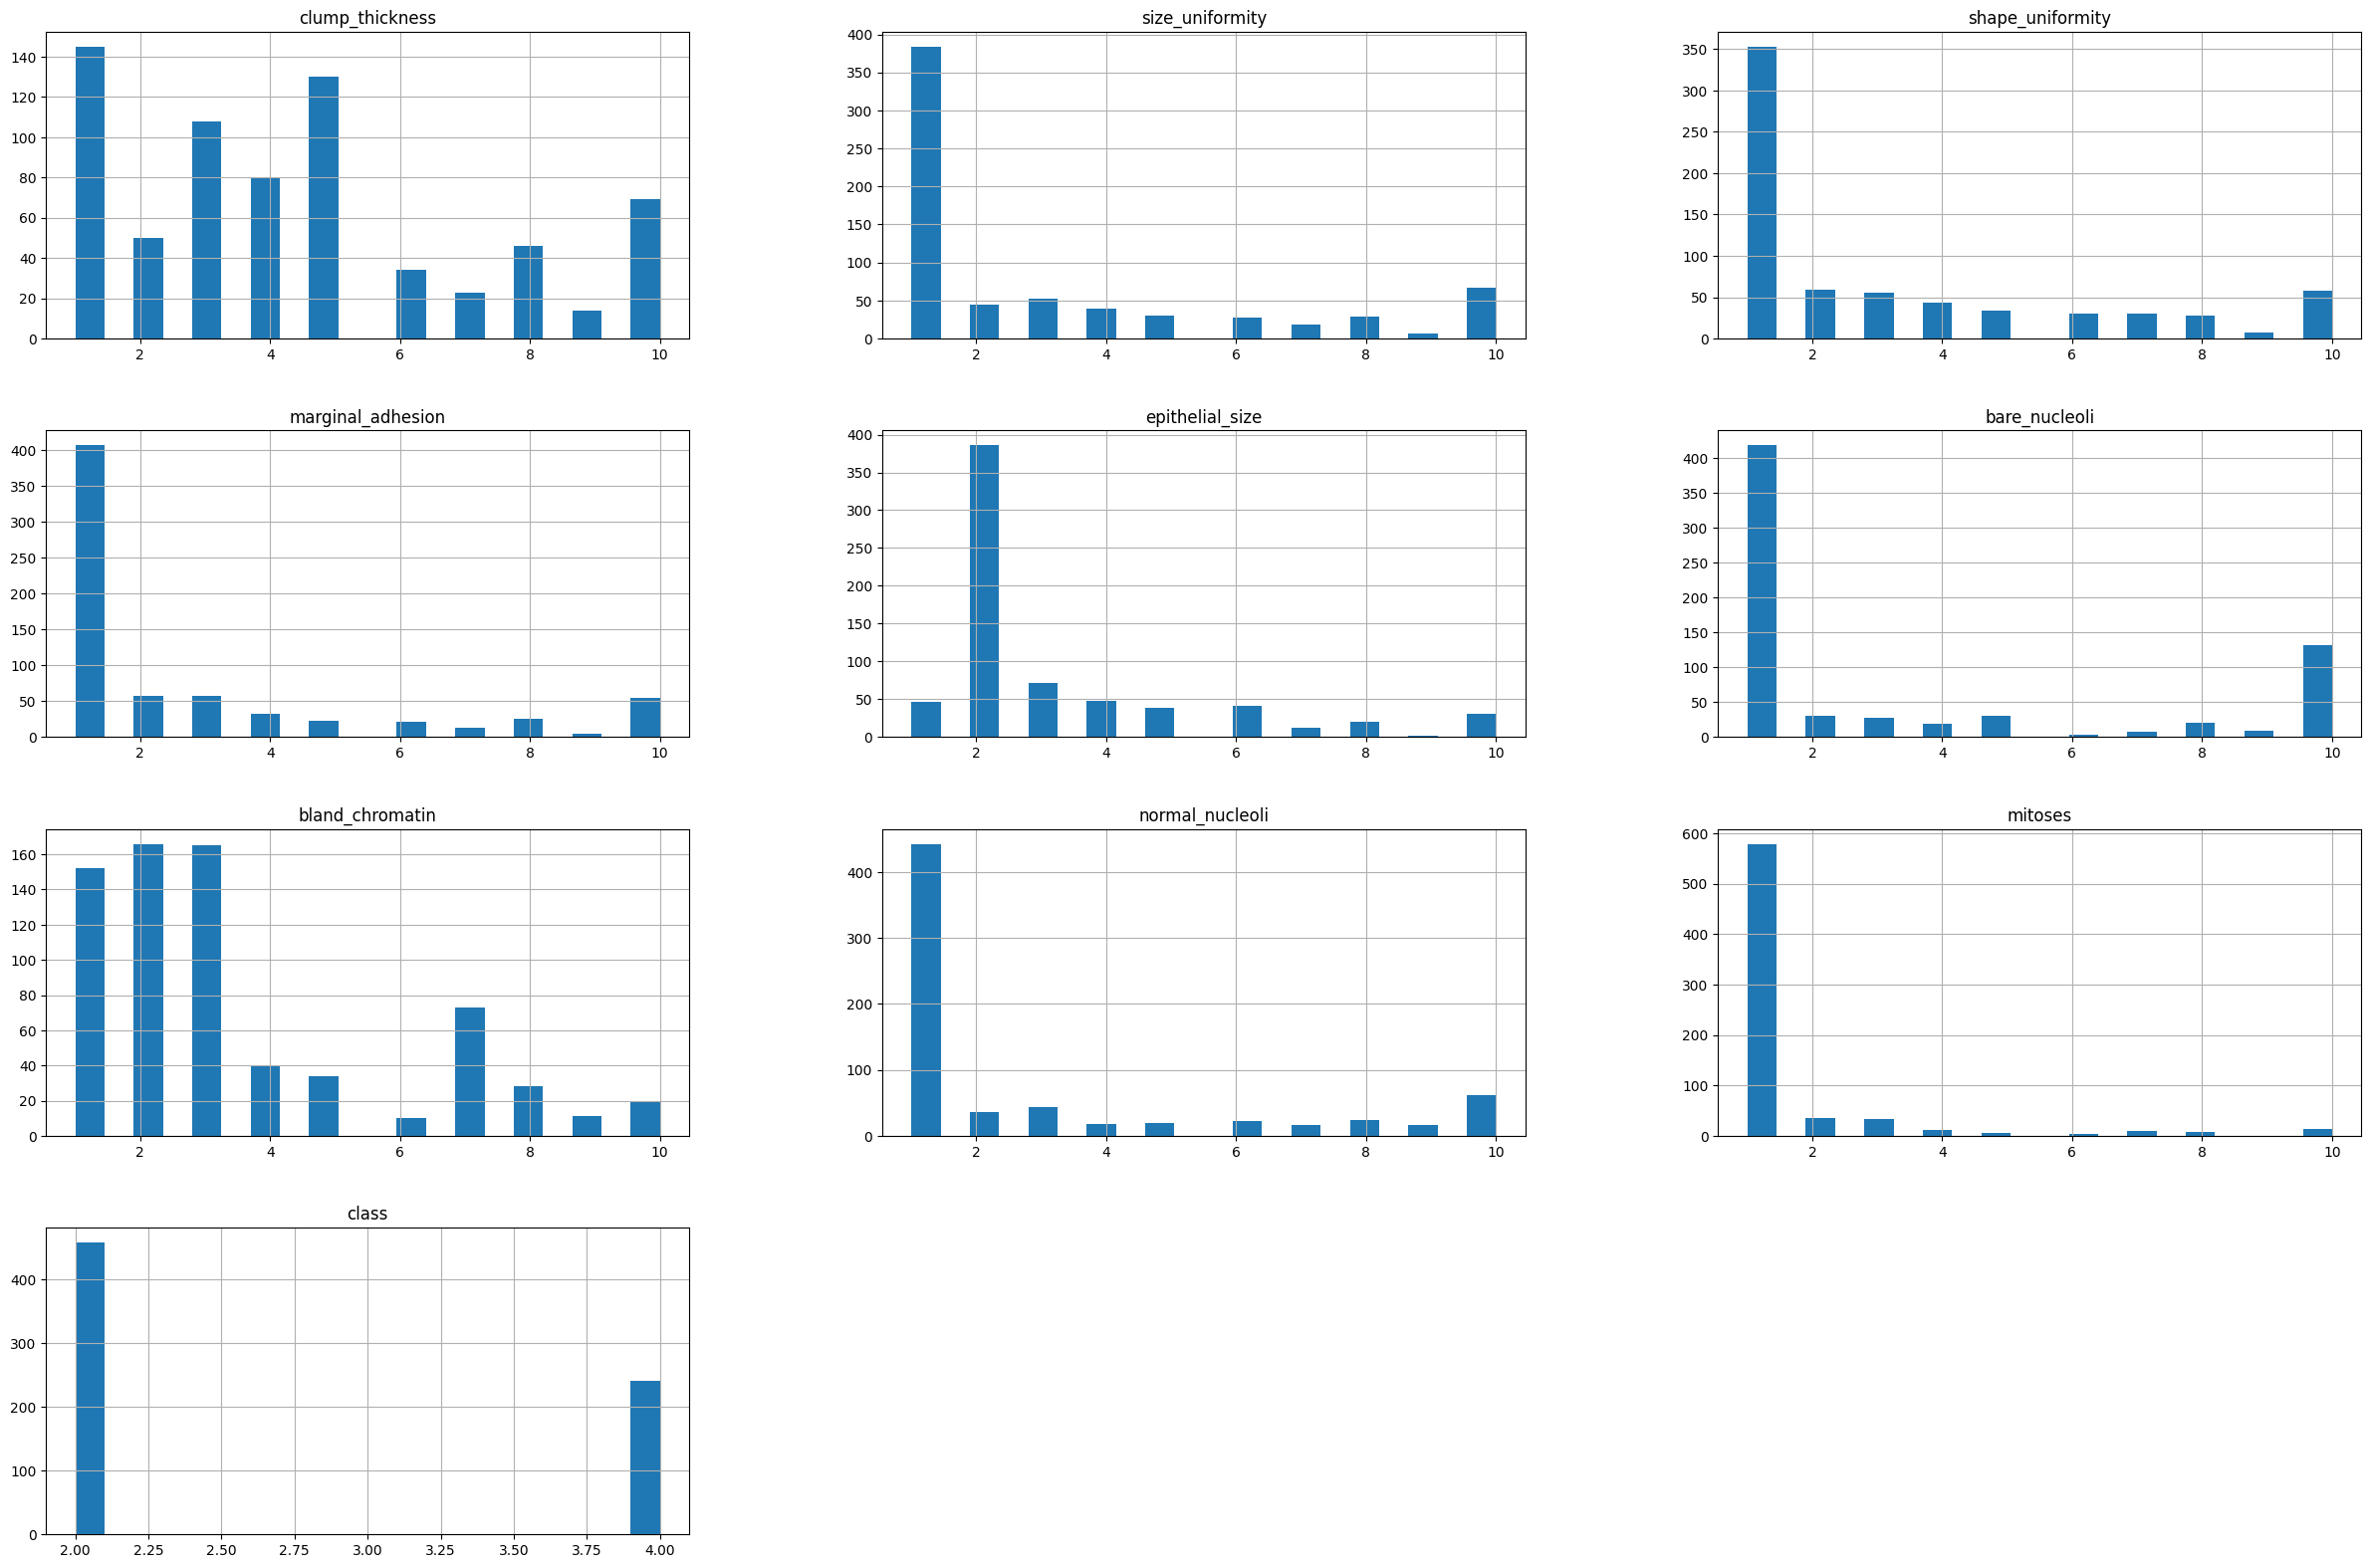

In [29]:
df.hist(bins=20, figsize=(30,30), layout=(6,3));

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

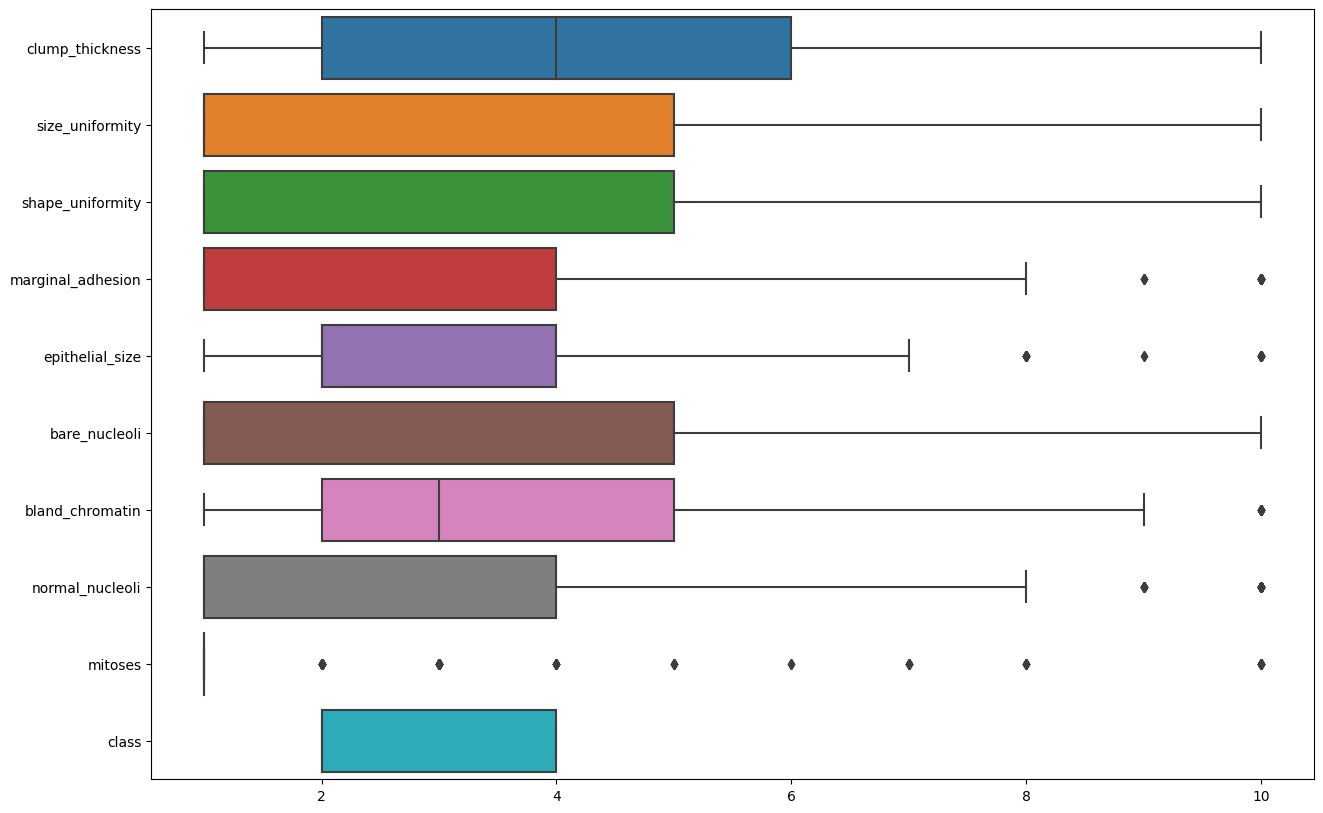

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, orient='h')

In [31]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


<IPython.core.display.Javascript object>

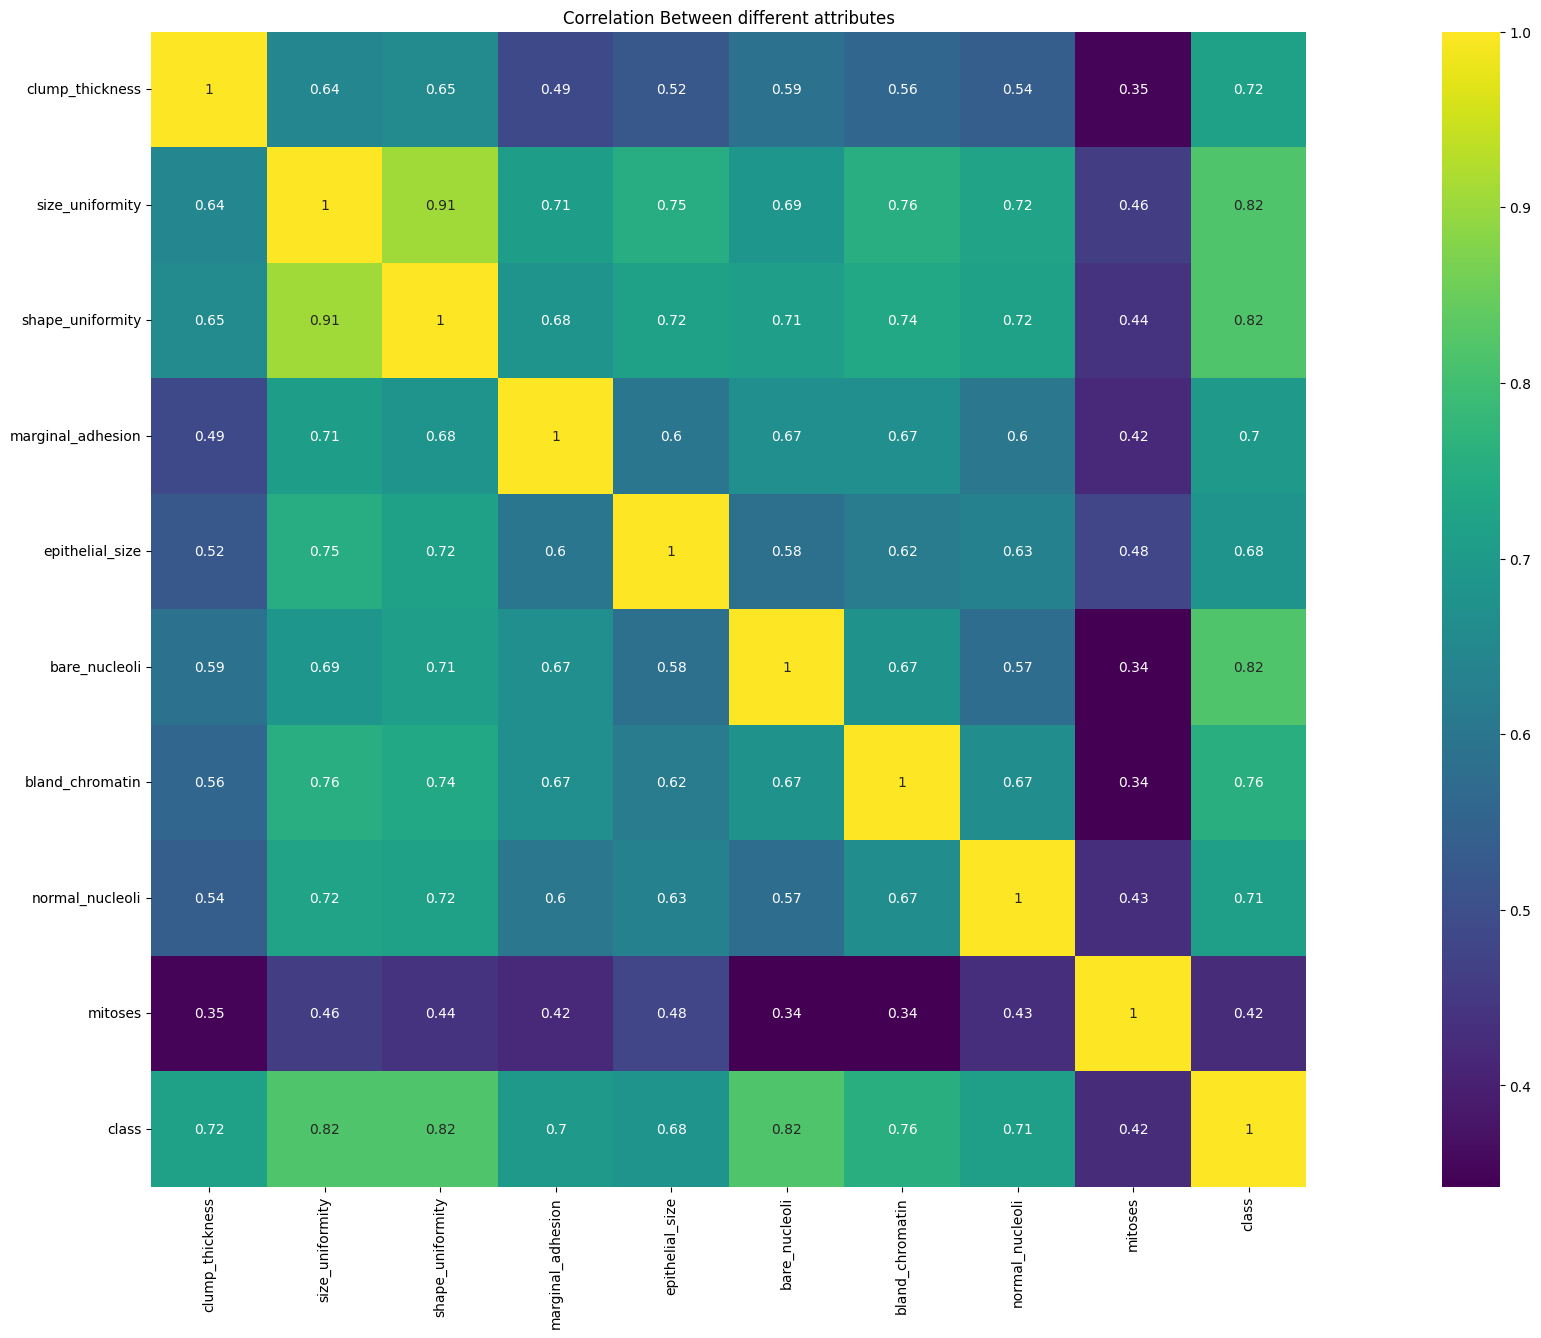

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(35,15))
sns.heatmap(df.corr(), annot=True, vmax=1, square=True, cmap='viridis')
plt.title('Correlation Between different attributes')
plt.show()

#### Pairplot

<IPython.core.display.Javascript object>

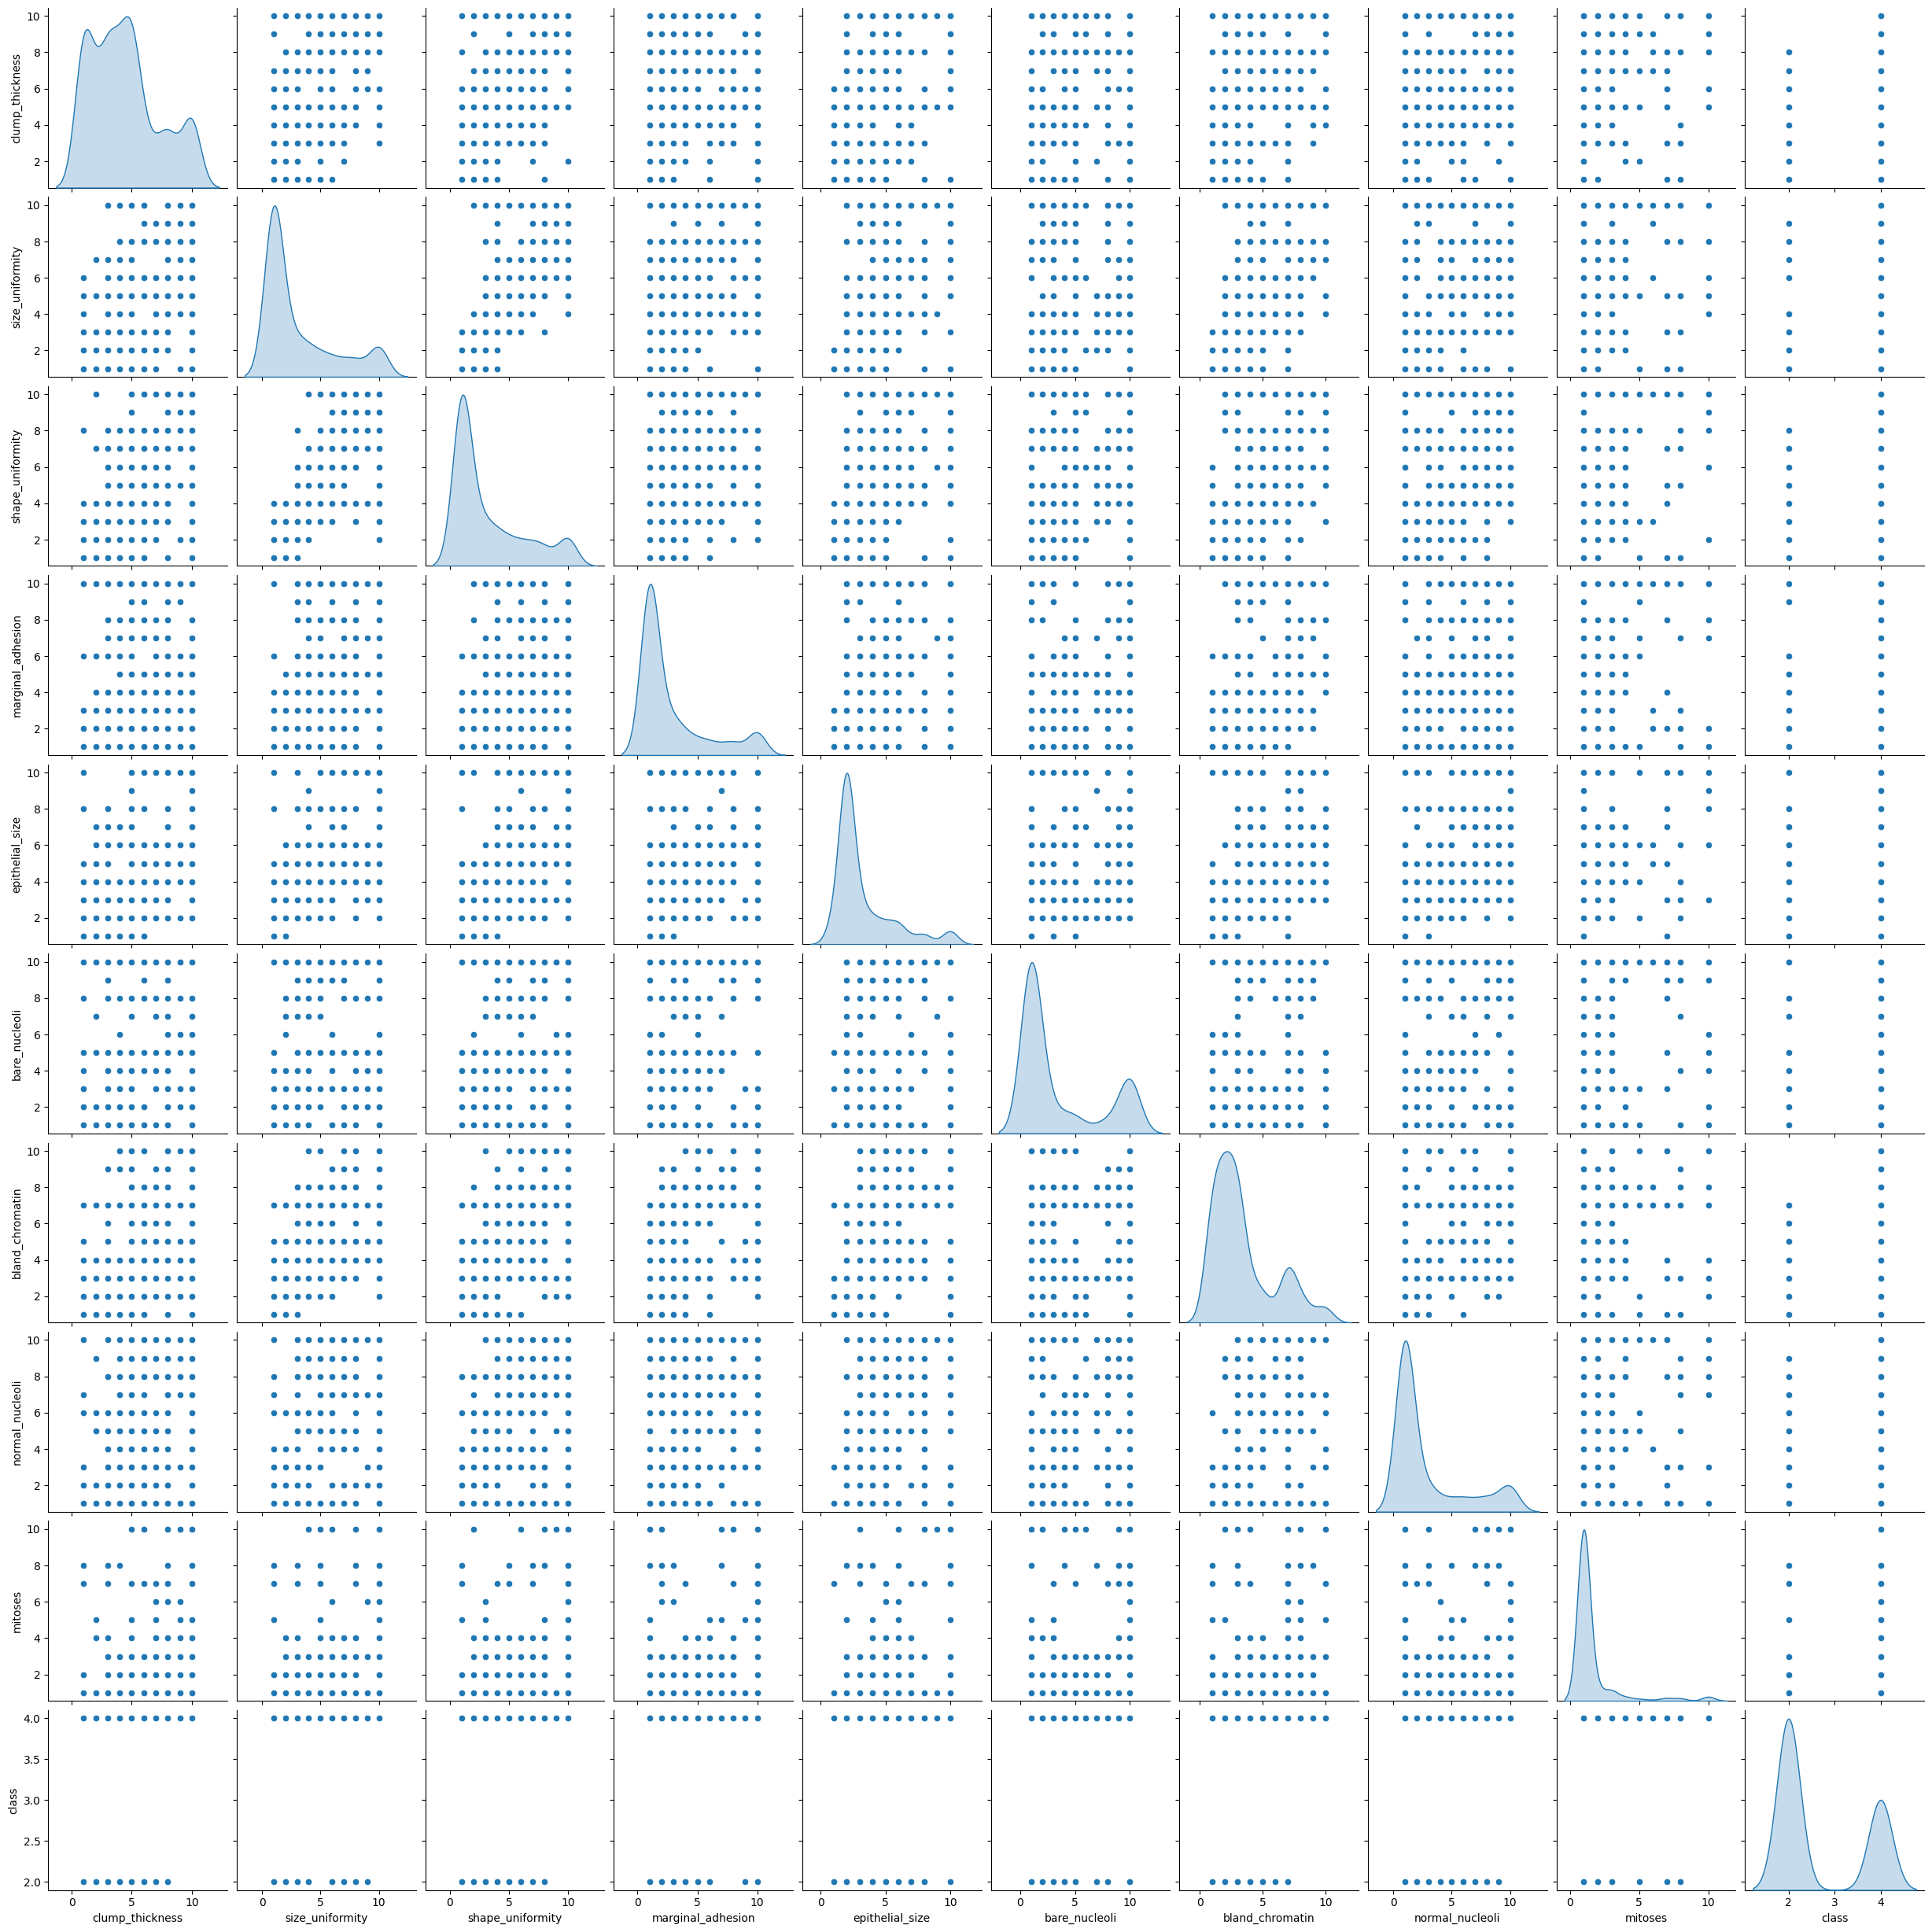

In [33]:
sns.pairplot(df, diag_kind='kde')
plt.show()

## Building Our Model

In [34]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [35]:
x = df.drop('class', axis=1)
y = df['class']

In [36]:
x.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [38]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

In [41]:
# we aree spliting the valus in 70:30

from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=.30, random_state=1)

### Kneighbors Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [44]:
knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [46]:
knn.score(x_test,y_test)

0.9761904761904762

In [47]:
Predicted_1 = knn.predict(x_test)
Predicted_1

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2])

In [52]:
from scipy.stats import zscore

print('KNeighbors Algorithms is predicting at: {0:.2g} %'.format(knn.score(x_test,y_test)*100))

KNeighbors Algorithms is predicting at: 98 %


### Support Vector machine

In [56]:
from sklearn.svm import SVC

svc = SVC(gamma=0.025, C=3)

svc.fit(x_train, y_train)

SVC(C=3, gamma=0.025)

In [61]:
Predicted_2 = svc.predict(x_test)

In [60]:
print('Support Vector Machine score is {0:.2g} %'.format(svc.score(x_test, y_test)*100))

Support Vector Machine score is 98 %


In [62]:
knn_predictions =  pd.DataFrame(Predicted_1)
svc_predictions =  pd.DataFrame(Predicted_2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
df1 = pd.concat([knn_predictions,svc_predictions], axis=1)
df1

<IPython.core.display.Javascript object>

,0,0
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
...,...,...
205,4,4
206,4,4
207,2,2
208,2,2


In [68]:
df1.columns = [['knn_predictions','svc_predictions']]

In [69]:
df1

,knn_predictions,svc_predictions
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
...,...,...
205,4,4
206,4,4
207,2,2
208,2,2


In [70]:
from sklearn.metrics import classification_report

In [74]:
print('knn_predictions')
print('----')
print(classification_report(y_test, Predicted_1))

knn_predictions
----
              precision    recall  f1-score   support

           2       0.97      0.99      0.98       137
           4       0.99      0.95      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.97      0.97       210
weighted avg       0.98      0.98      0.98       210



In [75]:
print('svc_predictions')
print('----')
print(classification_report(y_test, Predicted_2))

svc_predictions
----
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       137
           4       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



### Confusion Matrix

#### KNN- confusion Matrix

Confusion Matrix for KNN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

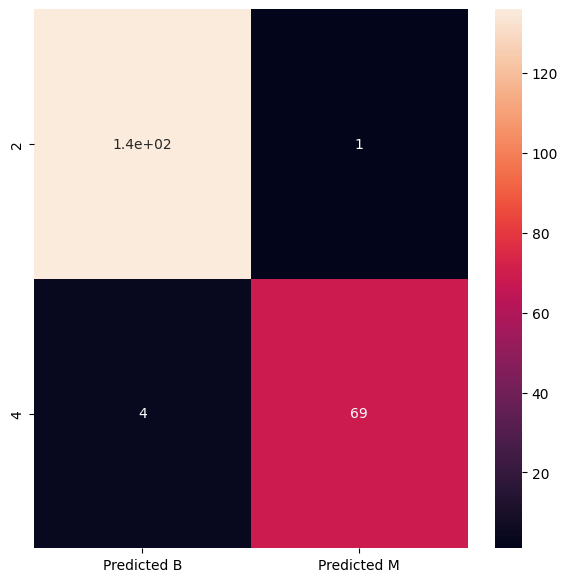

In [80]:
"from sklearn import metrics

print('Confusion Matrix for KNN')

cm = metrics.confusion_matrix(y_test, Predicted_1, labels=[2,4])


df = pd.DataFrame(cm, index = [i for i in [2,4]],
                      columns=[i for i in ['Predicted B','Predicted M']])

plt.figure(figsize=(7,7))
sns.heatmap(df, annot=True)
plt.show()

#### SVM- confusion matrix

confusion matrix for Support vector machine


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

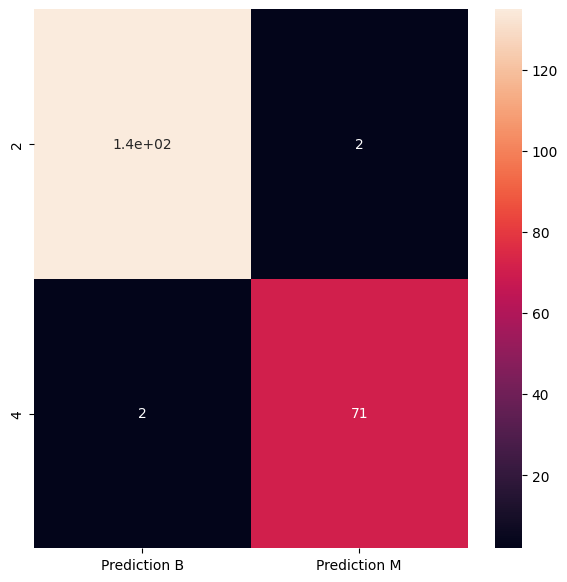

In [82]:
print('confusion matrix for Support vector machine')

cm_1 = metrics.confusion_matrix(y_test, Predicted_2, labels=[2,4])

df_cm = pd.DataFrame(cm_1, index=[i for i in [2,4]],
                          columns=[i for i in ['Prediction B','Prediction M']])

plt.figure(figsize=(7,7))
sns.heatmap(df_cm, annot=True)
plt.show()